In [12]:
import pandas as pd
import numpy as np
import pulp
from itertools import chain, combinations
import statistics as stats
import matplotlib.pyplot as plt
import seaborn as sns


counties_df = pd.read_csv('data/uscounties_geo.csv', header=0)
counties_df = counties_df[counties_df['state_id'] == 'WA'].reset_index(drop=True)
counties_df

,county,county_ascii,county_full,county_fips,state_id,state_name,lat,lng,population
0,King,King,King County,53033,WA,Washington,47.4902,-121.8052,2240876
1,Pierce,Pierce,Pierce County,53053,WA,Washington,47.0241,-122.1046,910225
2,Snohomish,Snohomish,Snohomish County,53061,WA,Washington,48.0475,-121.6975,820024
3,Spokane,Spokane,Spokane County,53063,WA,Washington,47.6207,-117.4040,531477
4,Clark,Clark,Clark County,53011,WA,Washington,45.7792,-122.4825,496494
5,Thurston,Thurston,Thurston County,53067,WA,Washington,46.9258,-122.8332,290642
6,Kitsap,Kitsap,Kitsap County,53035,WA,Washington,47.6130,-122.6716,273072
7,Yakima,Yakima,Yakima County,53077,WA,Washington,46.4571,-120.7385,255151
8,Whatcom,Whatcom,Whatcom County,53073,WA,Washington,48.8259,-121.7199,224533
9,Benton,Benton,Benton County,53005,WA,Washington,46.2398,-119.5112,204551


In [13]:
districts_df= pd.read_csv('data/county_districts.csv', header=0)
districts_df['county']=districts_df['county'].str.lstrip(' ').str.rstrip(' ')
counties_df['county']=counties_df['county'].str.lstrip(' ').str.rstrip(' ')
counties_df=counties_df.merge(districts_df, on='county', how='left')
counties_df

,county,county_ascii,county_full,county_fips,state_id,state_name,lat,lng,population,District
0,King,King,King County,53033,WA,Washington,47.4902,-121.8052,2240876,7
1,Pierce,Pierce,Pierce County,53053,WA,Washington,47.0241,-122.1046,910225,10
2,Snohomish,Snohomish,Snohomish County,53061,WA,Washington,48.0475,-121.6975,820024,1
3,Spokane,Spokane,Spokane County,53063,WA,Washington,47.6207,-117.4040,531477,5
4,Clark,Clark,Clark County,53011,WA,Washington,45.7792,-122.4825,496494,3
5,Thurston,Thurston,Thurston County,53067,WA,Washington,46.9258,-122.8332,290642,10
6,Kitsap,Kitsap,Kitsap County,53035,WA,Washington,47.6130,-122.6716,273072,6
7,Yakima,Yakima,Yakima County,53077,WA,Washington,46.4571,-120.7385,255151,4
8,Whatcom,Whatcom,Whatcom County,53073,WA,Washington,48.8259,-121.7199,224533,1
9,Benton,Benton,Benton County,53005,WA,Washington,46.2398,-119.5112,204551,4


In [14]:
## white only census
census_df = pd.read_csv('data/census_demographics.csv', header=0)
census_df['WA_MALE']=pd.to_numeric(census_df['WA_MALE'])
census_df['WA_FEMALE']=pd.to_numeric(census_df['WA_FEMALE'])
census_df['WHITE_POP']=census_df['WA_MALE']+census_df['WA_FEMALE']
census_df = census_df.groupby(['COUNTY', 'CTYNAME'])[['TOT_POP', 'WHITE_POP']].sum().reset_index()
census_df['CTYNAME']=census_df['CTYNAME'].str.lstrip(' ').str.rstrip(' ')
census_df

,COUNTY,CTYNAME,TOT_POP,WHITE_POP
0,1,Adams County,165642,145704
1,3,Asotin County,179178,165888
2,5,Benton County,1675328,1501572
3,7,Chelan County,636014,591962
4,9,Clallam County,621528,537626
5,11,Clark County,4075954,3474526
6,13,Columbia County,31884,28776
7,15,Cowlitz County,890726,806168
8,17,Douglas County,347996,320036
9,19,Ferry County,58178,44344


In [15]:
# the strings arent joining but I can sort and join on the index
counties_df=counties_df.sort_values(by=['county']).reset_index(drop=True)
census_df=census_df.sort_values(by=['CTYNAME']).reset_index(drop=True)
counties_df=counties_df.merge(census_df, left_index=True, right_index=True, how='left')
for i,j in zip( census_df['CTYNAME'].to_list(), counties_df['county'].to_list()):
    print(i, '  ', j)

counties_df

Adams County    Adams
Asotin County    Asotin
Benton County    Benton
Chelan County    Chelan
Clallam County    Clallam
Clark County    Clark
Columbia County    Columbia
Cowlitz County    Cowlitz
Douglas County    Douglas
Ferry County    Ferry
Franklin County    Franklin
Garfield County    Garfield
Grant County    Grant
Grays Harbor County    Grays Harbor
Island County    Island
Jefferson County    Jefferson
King County    King
Kitsap County    Kitsap
Kittitas County    Kittitas
Klickitat County    Klickitat
Lewis County    Lewis
Lincoln County    Lincoln
Mason County    Mason
Okanogan County    Okanogan
Pacific County    Pacific
Pend Oreille County    Pend Oreille
Pierce County    Pierce
San Juan County    San Juan
Skagit County    Skagit
Skamania County    Skamania
Snohomish County    Snohomish
Spokane County    Spokane
Stevens County    Stevens
Thurston County    Thurston
Wahkiakum County    Wahkiakum
Walla Walla County    Walla Walla
Whatcom County    Whatcom
Whitman County    Whit

,county,county_ascii,county_full,county_fips,state_id,state_name,lat,lng,population,District,COUNTY,CTYNAME,TOT_POP,WHITE_POP
0,Adams,Adams,Adams County,53001,WA,Washington,46.9834,-118.5606,20353,4,1,Adams County,165642,145704
1,Asotin,Asotin,Asotin County,53003,WA,Washington,46.1918,-117.2030,22285,5,3,Asotin County,179178,165888
2,Benton,Benton,Benton County,53005,WA,Washington,46.2398,-119.5112,204551,4,5,Benton County,1675328,1501572
3,Chelan,Chelan,Chelan County,53007,WA,Washington,47.8692,-120.6190,78508,8,7,Chelan County,636014,591962
4,Clallam,Clallam,Clallam County,53009,WA,Washington,48.0493,-123.9280,76727,6,9,Clallam County,621528,537626
5,Clark,Clark,Clark County,53011,WA,Washington,45.7792,-122.4825,496494,3,11,Clark County,4075954,3474526
6,Columbia,Columbia,Columbia County,53013,WA,Washington,46.2975,-117.9078,3969,5,13,Columbia County,31884,28776
7,Cowlitz,Cowlitz,Cowlitz County,53015,WA,Washington,46.1932,-122.6810,109457,3,15,Cowlitz County,890726,806168
8,Douglas,Douglas,Douglas County,53017,WA,Washington,47.7361,-119.6918,42622,8,17,Douglas County,347996,320036
9,Ferry,Ferry,Ferry County,53019,WA,Washington,48.4703,-118.5166,7198,5,19,Ferry County,58178,44344


In [16]:
del counties_df['county']
counties_df=counties_df.reset_index(names='county')
counties_df

,county,county_ascii,county_full,county_fips,state_id,state_name,lat,lng,population,District,COUNTY,CTYNAME,TOT_POP,WHITE_POP
0,0,Adams,Adams County,53001,WA,Washington,46.9834,-118.5606,20353,4,1,Adams County,165642,145704
1,1,Asotin,Asotin County,53003,WA,Washington,46.1918,-117.2030,22285,5,3,Asotin County,179178,165888
2,2,Benton,Benton County,53005,WA,Washington,46.2398,-119.5112,204551,4,5,Benton County,1675328,1501572
3,3,Chelan,Chelan County,53007,WA,Washington,47.8692,-120.6190,78508,8,7,Chelan County,636014,591962
4,4,Clallam,Clallam County,53009,WA,Washington,48.0493,-123.9280,76727,6,9,Clallam County,621528,537626
5,5,Clark,Clark County,53011,WA,Washington,45.7792,-122.4825,496494,3,11,Clark County,4075954,3474526
6,6,Columbia,Columbia County,53013,WA,Washington,46.2975,-117.9078,3969,5,13,Columbia County,31884,28776
7,7,Cowlitz,Cowlitz County,53015,WA,Washington,46.1932,-122.6810,109457,3,15,Cowlitz County,890726,806168
8,8,Douglas,Douglas County,53017,WA,Washington,47.7361,-119.6918,42622,8,17,Douglas County,347996,320036
9,9,Ferry,Ferry County,53019,WA,Washington,48.4703,-118.5166,7198,5,19,Ferry County,58178,44344


In [17]:
# Washington has 10 districts
max_district = 10
counties_df['TOT_POP'] = counties_df['TOT_POP'].astype("int")
counties_df['WHITE_POP'] = counties_df['WHITE_POP'].astype("int")
counties_df['lat'] = counties_df['lat'].astype("float")
counties_df['lng'] = counties_df['lng'].astype("float")

max_district = 10
max_population = (counties_df['population'].sum() / max_district) * 1.5
statewide_white_percentage = counties_df['WHITE_POP'].sum() / counties_df['TOT_POP'].sum()

counties_lat_Dic = dict(zip(counties_df.county, counties_df.lat))
counties_Long_Dic = dict(zip(counties_df.county, counties_df.lng))
counties_Pop_Dic = dict(zip(counties_df.county, counties_df.TOT_POP))
counties_WhitePop_Dic = dict(zip(counties_df.county, counties_df.WHITE_POP))



In [18]:
county_adjacency = {}
with open("data/county_adjacency.txt", 'r', encoding='ISO-8859-1') as file:
    lines = file.readlines()

for line in lines:
    parts = line.strip().split('\t')
    if len(parts) < 4:
        continue
    county_fips = parts[1]
    if county_fips.startswith('53'):
        county_name = parts[0].replace('"', '')
        adjacent_county_fips = parts[3]
        adjacent_county_name = parts[2].replace('"', '')
        if county_name not in county_adjacency:
            county_adjacency[county_name] = []
        if adjacent_county_fips.startswith('53'):
            county_adjacency[county_name].append(adjacent_county_name)


sorted_counties = sorted(county_adjacency.keys())
adjacency_matrix = pd.DataFrame(0, index=sorted_counties, columns=sorted_counties, dtype=int)
for county, neighbors in county_adjacency.items():
    for neighbor in neighbors:
        adjacency_matrix.at[county, neighbor] = 1
        adjacency_matrix.at[neighbor, county] = 1


county_index_to_name_map = counties_df['county'].to_dict()

index_to_county_map = {index: county for index, county in enumerate(counties_df['county'])}


In [19]:
adjacency_matrix=adjacency_matrix.sort_index().reset_index(drop=True)
adjacency_matrix.columns = counties_df['county'].to_list()
adjacency_matrix

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [20]:
from pyscipopt import Model, quicksum
from itertools import chain, combinations
import statistics as stats


def compactness(district):
    lat_list = [counties_lat_Dic[county] for county in district]
    long_list = [counties_Long_Dic[county] for county in district]

    lat_sd = stats.stdev(lat_list)
    long_sd = stats.stdev(long_list)

    return lat_sd + long_sd


def total_pop(district):
    pop_list = [counties_Pop_Dic.get(county, 0) for county in district]
    return sum(pop_list)


def white_pop_percentage(district):
    white_pop_list = [counties_WhitePop_Dic.get(county, 0) for county in district]
    total_pop_list = [counties_Pop_Dic.get(county, 0) for county in district]
    white_pop = sum(white_pop_list)
    total_pop = sum(total_pop_list)
    return (white_pop / total_pop) if total_pop > 0 else 0

min_len = 2
max_len = 5
counties = counties_df['county'].tolist()
possible_districts = list(chain.from_iterable(combinations(counties, i) for i in range(min_len, max_len + 1)))

redistrict_model = Model("Redistricting Model")

x = {}
for district in possible_districts:
    x[district] = redistrict_model.addVar(vtype="B", name="district_{}".format(district))

objective_terms = [
    compactness(district) * x[district] for district in possible_districts
] + [
    abs(white_pop_percentage(district) - statewide_white_percentage) * x[district] for district in possible_districts
]
redistrict_model.setObjective(quicksum(objective_terms), "minimize")

redistrict_model.addCons(quicksum(x[district] for district in possible_districts) == max_district, "Maximum_number_of_districts")

for district in possible_districts:
    for county1 in district:
        for county2 in district:
            if county1 != county2:
                if adjacency_matrix.at[county1, county2] == 0:
                    redistrict_model.addCons(x[district] == 0)

redistrict_model.optimize()

status = redistrict_model.getStatus()
if status == "optimal":
    print("Optimal solution found!")
    for district in possible_districts:
        if redistrict_model.getVal(x[district]) > 0:
            print(f"District {district}: {redistrict_model.getVal(x[district])}")
else:
    print("No optimal solution found. Status:", status)

presolving:
Optimal solution found!
District (0, 10): 1.0
District (0, 21): 1.0
District (3, 18): 1.0
District (4, 15): 1.0
District (7, 20): 1.0
District (9, 32): 1.0
District (13, 22): 1.0
District (13, 33): 1.0
District (14, 17): 1.0
District (16, 26): 1.0
(round 1, fast)       667869 del vars, 12236456 del conss, 0 add conss, 667869 chg bounds, 0 chg sides, 0 chg coeffs, 0 upgd conss, 0 impls, 0 clqs
   (30.9s) running MILP presolver
   (31.1s) MILP presolver found nothing
   (31.1s) probing cycle finished: starting next cycle
   (31.1s) symmetry computation started: requiring (bin +, int -, cont +), (fixed: bin -, int +, cont -)
   (31.1s) no symmetry present
presolving (2 rounds: 2 fast, 1 medium, 1 exhaustive):
 667869 deleted vars, 12236456 deleted constraints, 0 added constraints, 667869 tightened bounds, 0 added holes, 0 changed sides, 0 changed coefficients
 0 implications, 0 cliques
presolved problem has 19 variables (19 bin, 0 int, 0 impl, 0 cont) and 1 constraints
      1

In [21]:
def check_no_change(orig, opt):
    if opt == 0:
        return orig
    else:
        return opt
    
if redistrict_model.getStatus() == 'optimal':
    chosen_districts = [district for district in possible_districts if redistrict_model.getVal(x[district]) > 0.5]
    county_to_district_map = {}
    district_number = 1
    for district in chosen_districts:
        for county in district:
            
            county_to_district_map[county] = district_number
        district_number += 1
        
    counties_df['Optimized_District'] = counties_df['county'].apply(lambda c: county_to_district_map.get(c, 0))
    
    counties_df['Optimized_District'] = counties_df.apply(lambda x: check_no_change(x['District'], x['Optimized_District']), axis=1)
    

else:
    print("No optimal solution found. Status:", redistrict_model.getStatus())

counties_df['Percent_White']=counties_df['WHITE_POP']/counties_df['TOT_POP']
counties_df.head()

,county,county_ascii,county_full,county_fips,state_id,state_name,lat,lng,population,District,COUNTY,CTYNAME,TOT_POP,WHITE_POP,Optimized_District,Percent_White
0,0,Adams,Adams County,53001,WA,Washington,46.9834,-118.5606,20353,4,1,Adams County,165642,145704,2,0.879632
1,1,Asotin,Asotin County,53003,WA,Washington,46.1918,-117.2030,22285,5,3,Asotin County,179178,165888,5,0.925828
2,2,Benton,Benton County,53005,WA,Washington,46.2398,-119.5112,204551,4,5,Benton County,1675328,1501572,4,0.896285
3,3,Chelan,Chelan County,53007,WA,Washington,47.8692,-120.6190,78508,8,7,Chelan County,636014,591962,3,0.930737
4,4,Clallam,Clallam County,53009,WA,Washington,48.0493,-123.9280,76727,6,9,Clallam County,621528,537626,4,0.865007


In [22]:
import geopandas as gpd

geojson_path = 'data/washington-state-counties_.geojson'
geojson_gdf = gpd.read_file(geojson_path)
counties_df['county_full'] = counties_df['county_full'].str.title()
merged_gdf = geojson_gdf.merge(counties_df, left_on='NAME', right_on='county_ascii', how='left')
merged_gdf[['county', 'NAME', 'District', 'Optimized_District', 'Percent_White', 'geometry']]

,county,NAME,District,Optimized_District,Percent_White,geometry
0,2,Benton,4,4,0.896285,"MULTIPOLYGON Z (((-119.87615 46.56757 0.00000,..."
1,4,Clallam,6,4,0.865007,"MULTIPOLYGON Z (((-124.60221 48.38693 0.00000,..."
2,5,Clark,3,3,0.852445,"MULTIPOLYGON Z (((-122.79596 45.82502 0.00000,..."
3,7,Cowlitz,3,5,0.905068,"MULTIPOLYGON Z (((-123.21784 46.38513 0.00000,..."
4,12,Grant,4,4,0.912016,"MULTIPOLYGON Z (((-120.04227 47.07625 0.00000,..."
5,15,Jefferson,6,4,0.909564,"MULTIPOLYGON Z (((-122.94347 48.12291 0.00000,..."
6,18,Kittitas,8,3,0.915608,"MULTIPOLYGON Z (((-121.46618 47.36802 0.00000,..."
7,22,Mason,6,7,0.870984,"MULTIPOLYGON Z (((-123.50603 47.34404 0.00000,..."
8,30,Snohomish,1,1,0.752179,"MULTIPOLYGON Z (((-122.33164 48.02056 0.00000,..."
9,21,Lincoln,5,2,0.930423,"MULTIPOLYGON Z (((-118.97928 47.36417 0.00000,..."


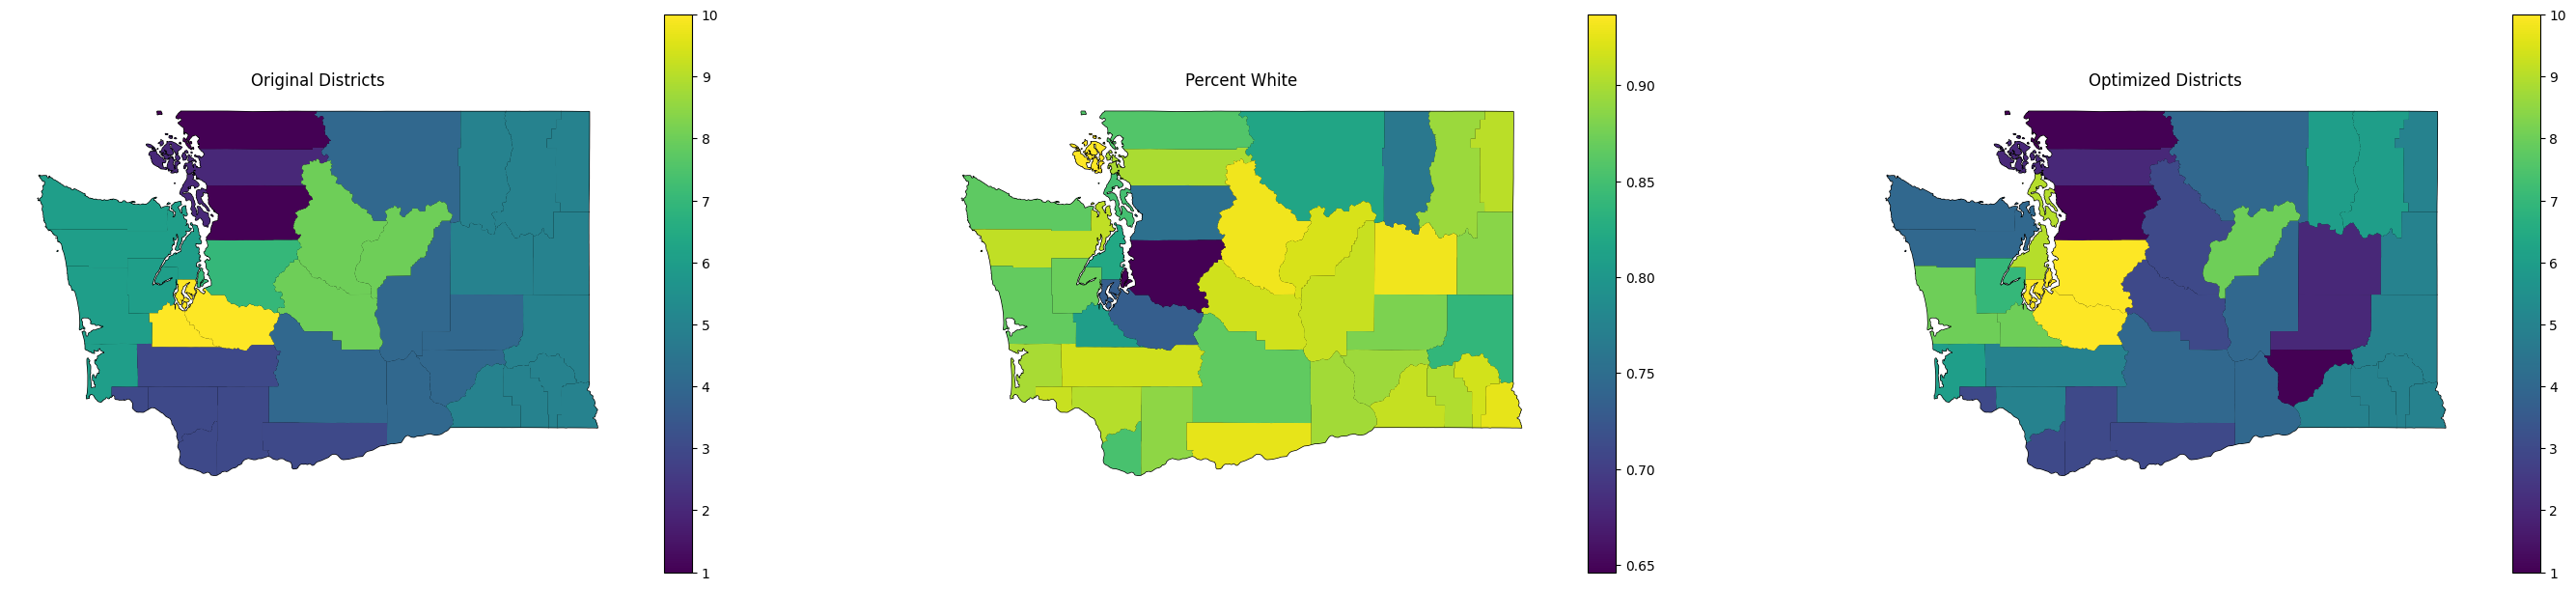

In [25]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

categorical_colors = ListedColormap(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f'])

legend_handles = [Patch(facecolor=categorical_colors.colors[i], label=f'District {i+1}') for i in range(8)]
fig, ax = plt.subplots(1, 3, figsize=(35, 25))

geojson_gdf.plot(ax=ax[0], color='white', edgecolor='black')
merged_gdf.plot(ax=ax[0], column='District', legend=True, legend_kwds={'shrink': 0.3})
ax[0].set_title('Original Districts')
ax[0].set_axis_off()

geojson_gdf.plot(ax=ax[1], color='white', edgecolor='black')
merged_gdf.plot(ax=ax[1], column='Percent_White', cmap='viridis', legend=True, legend_kwds={'shrink': 0.3})
ax[1].set_title('Percent White')
ax[1].set_axis_off()

geojson_gdf.plot(ax=ax[2], color='white', edgecolor='black')
merged_gdf.plot(ax=ax[2], column='Optimized_District', legend=True, legend_kwds={'shrink': 0.3})
ax[2].set_title('Optimized Districts')
ax[2].set_axis_off()

plt.show()